# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "WeatherPy/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 648


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}&units={units}&appid={weather_api_key}&q="

# List for holding reponse information
lon = []
temp = []
temp_max = []
humidity = []
wind_speed = []
lat = []
date = []
country = []
cloudiness = []


# Loop through the list of cities and request for data on each
print("Beginning Data Retrieval")
print("-------------------------------------")
count = 0
set = 1
for index, city in enumerate(cities):
    count = count + 1
    # To avoid api call rate limits, get city weather data in sets of 50 cities,
    # with 5 seconds sleep time, and then continue
    if count == 51:
        count = 1
        set = set + 1
        time.sleep(5)
    print(f"Processing Record {count} of Set {set} | {city}")
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        print("City not found. Skipping...")
       
    print("-------------------------------------")
    print("Data Retrieval Complete")
    print("-------------------------------------")

Beginning Data Retrieval
-------------------------------------
Processing Record 1 of Set 1 | ocos
Processing Record 2 of Set 1 | faanui
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | tolentino
Processing Record 9 of Set 1 | fort nelson
Processing Record 10 of Set 1 | amderma
City not found. Skipping...
Processing Record 11 of Set 1 | saskylakh
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | kaitangata
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | khatanga
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | atambua
Processing Record 18 of Set 1 | kirkwall
Processing Record 19 of Set 1 | fukue
Processing Record 20 of Set 1 | yomitan
City not found. Skipping...
Processing Record 21 of Set 1 | saint anthony
Processing Record 22 of Set 1 | bud
Pro

Processing Record 41 of Set 4 | buraydah
Processing Record 42 of Set 4 | athabasca
Processing Record 43 of Set 4 | mpraeso
Processing Record 44 of Set 4 | afsin
Processing Record 45 of Set 4 | mayo
Processing Record 46 of Set 4 | mosquera
Processing Record 47 of Set 4 | gamboula
Processing Record 48 of Set 4 | surt
Processing Record 49 of Set 4 | norman wells
Processing Record 50 of Set 4 | san quintin
Processing Record 1 of Set 5 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 5 | dikson
Processing Record 3 of Set 5 | rungata
City not found. Skipping...
Processing Record 4 of Set 5 | sao filipe
Processing Record 5 of Set 5 | vammala
Processing Record 6 of Set 5 | snasa
Processing Record 7 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 8 of Set 5 | puerto narino
Processing Record 9 of Set 5 | dubovskoye
Processing Record 10 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 11 of Set 5 | fonte boa
Processing Record 12 of Set 5 | zhezkazgan

Processing Record 28 of Set 8 | kyra
Processing Record 29 of Set 8 | laguna
Processing Record 30 of Set 8 | okha
Processing Record 31 of Set 8 | macas
Processing Record 32 of Set 8 | chulym
Processing Record 33 of Set 8 | tura
Processing Record 34 of Set 8 | sanmenxia
Processing Record 35 of Set 8 | vodnyy
Processing Record 36 of Set 8 | pombas
Processing Record 37 of Set 8 | constitucion
Processing Record 38 of Set 8 | poum
Processing Record 39 of Set 8 | nyurba
Processing Record 40 of Set 8 | haapu
City not found. Skipping...
Processing Record 41 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 42 of Set 8 | honiara
Processing Record 43 of Set 8 | hamilton
Processing Record 44 of Set 8 | maragogi
Processing Record 45 of Set 8 | diego de almagro
Processing Record 46 of Set 8 | balsas
Processing Record 47 of Set 8 | lasa
Processing Record 48 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 49 of Set 8 | winnipeg
Processing Record 50 of Set 8 | raws

Processing Record 13 of Set 12 | semporna
Processing Record 14 of Set 12 | shetpe
Processing Record 15 of Set 12 | iqaluit
Processing Record 16 of Set 12 | ancud
Processing Record 17 of Set 12 | mildura
Processing Record 18 of Set 12 | cockburn town
Processing Record 19 of Set 12 | trofors
Processing Record 20 of Set 12 | kualakapuas
Processing Record 21 of Set 12 | batsfjord
Processing Record 22 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 23 of Set 12 | inirida
Processing Record 24 of Set 12 | tashtyp
Processing Record 25 of Set 12 | rafsanjan
Processing Record 26 of Set 12 | meyungs
City not found. Skipping...
Processing Record 27 of Set 12 | sassandra
Processing Record 28 of Set 12 | pavilosta
Processing Record 29 of Set 12 | mount gambier
Processing Record 30 of Set 12 | coruripe
Processing Record 31 of Set 12 | nhulunbuy
Processing Record 32 of Set 12 | karaul
City not found. Skipping...
Processing Record 33 of Set 12 | vila velha
Processing Record 34 of S

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame({"City": city, 
                          "Lat": lat, 
                          "Lng": lon, 
                          "Max Temp": temp_max,
                          "Humidity": humidity,
                          "Cloudiness": cloudiness,
                          "Wind Speed": wind_speed,
                          "Country": country,
                          "Date": date,
                            })

# Show Record Count
city_data_df.count()

City          648
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint-honore,14.5094,-92.1933,87.98,59.0,0.0,13.15,GT,1.675893e+09
1,saint-honore,-16.4833,-151.7500,80.64,73.0,17.0,11.10,PF,1.675893e+09
2,saint-honore,-46.6000,168.3333,50.81,57.0,71.0,20.94,NZ,1.675893e+09
3,saint-honore,-34.4187,19.2345,68.81,77.0,0.0,16.71,ZA,1.675893e+09
4,saint-honore,-21.2078,-159.7750,84.25,70.0,40.0,12.66,CK,1.675893e+09


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("WeatherPy/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("WeatherPy/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint-honore,14.5094,-92.1933,87.98,59.0,0.0,13.15,GT,1.675893e+09
1,saint-honore,-16.4833,-151.7500,80.64,73.0,17.0,11.10,PF,1.675893e+09
2,saint-honore,-46.6000,168.3333,50.81,57.0,71.0,20.94,NZ,1.675893e+09
3,saint-honore,-34.4187,19.2345,68.81,77.0,0.0,16.71,ZA,1.675893e+09
4,saint-honore,-21.2078,-159.7750,84.25,70.0,40.0,12.66,CK,1.675893e+09


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

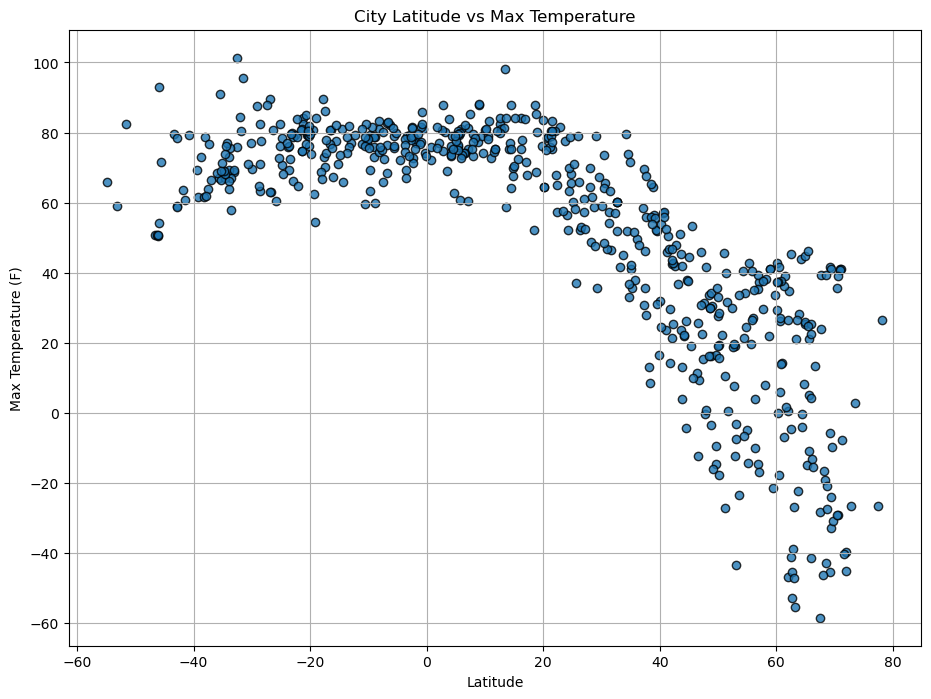

In [13]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

# Incorporate the other graph properties
fig1, ax1 = plt.subplots(figsize=(11,8))
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.title(f"City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save the figure
plt.savefig("WeatherPy/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

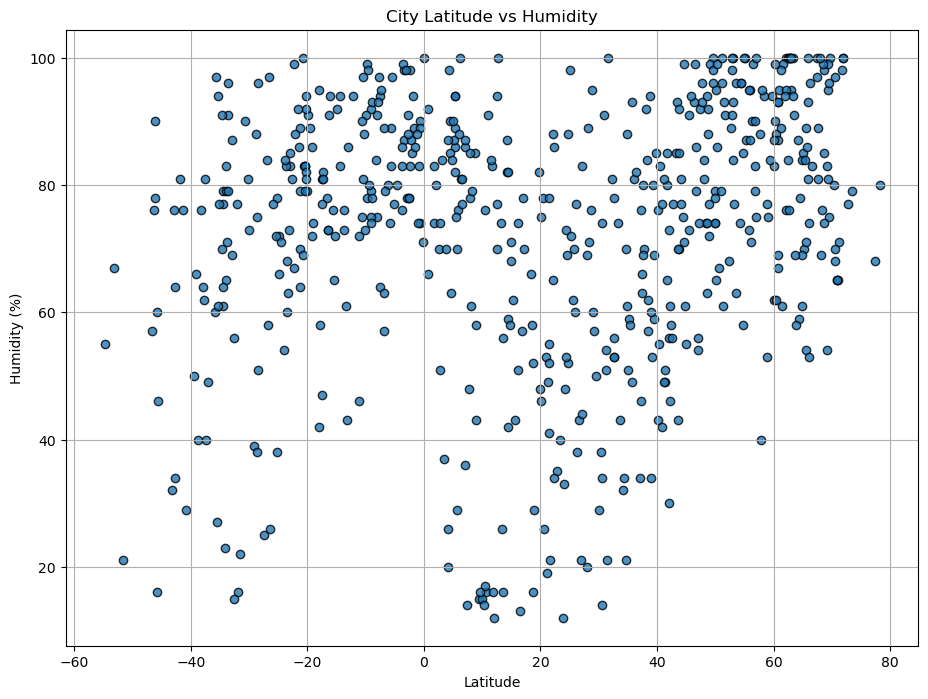

In [14]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

# Incorporate the other graph properties
fig1, ax1 = plt.subplots(figsize=(11, 8))
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity")
plt.grid()

# Save the figure
plt.savefig("WeatherPy/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

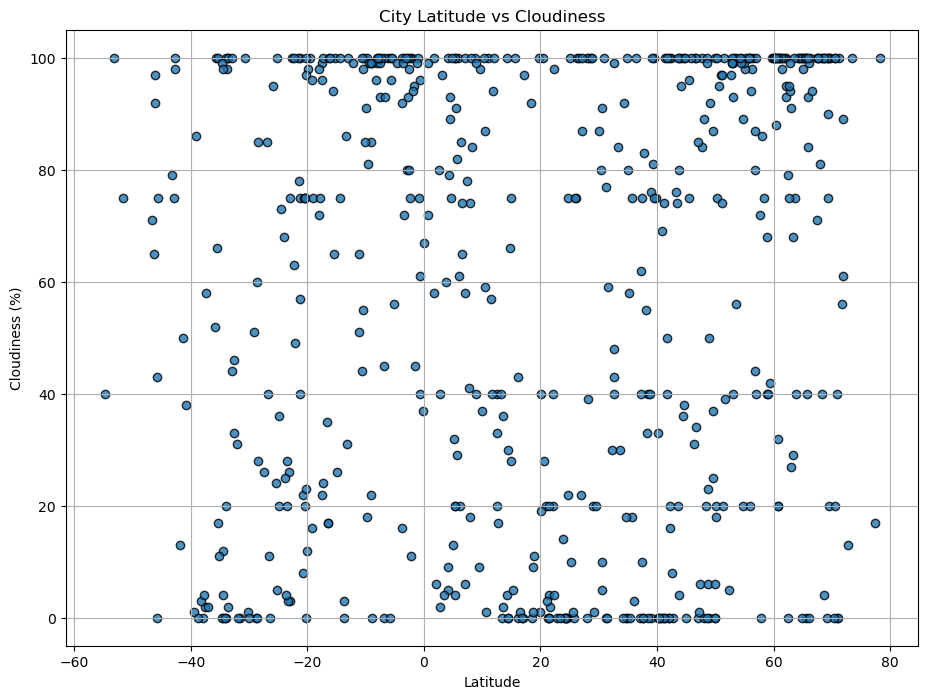

In [15]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

# Incorporate the other graph properties
fig1, ax1 = plt.subplots(figsize=(11, 8))
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness")
plt.grid()
# Save the figure
plt.savefig("WeatherPy/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

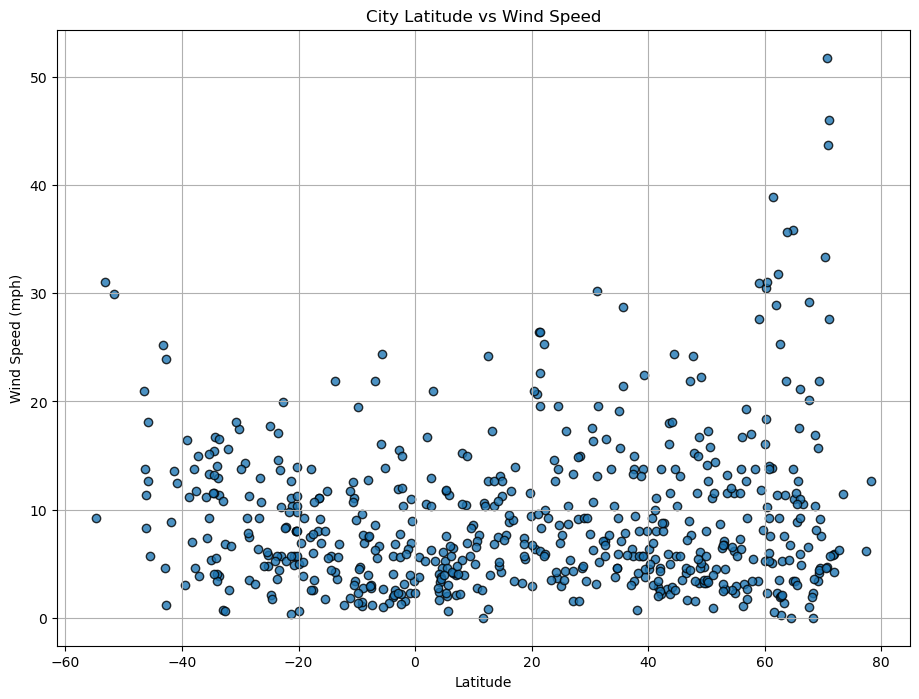

In [16]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

# Incorporate the other graph properties
fig1, ax1 = plt.subplots(figsize=(11, 8))
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed")
plt.grid()

# Save the figure
plt.savefig("WeatherPy/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint-honore,14.5094,-92.1933,87.98,59.0,0.0,13.15,GT,1.675893e+09
7,saint-honore,43.2126,13.2901,36.77,85.0,76.0,2.66,IT,1.675893e+09
8,saint-honore,58.8053,-122.7002,21.94,53.0,40.0,3.44,CA,1.675893e+09
10,saint-honore,71.9167,114.0833,-39.51,100.0,89.0,5.91,RU,1.675893e+09
13,saint-honore,19.7297,-155.0900,76.28,82.0,100.0,11.50,US,1.675893e+09


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,saint-honore,-16.4833,-151.7500,80.64,73.0,17.0,11.10,PF,1.675893e+09
2,saint-honore,-46.6000,168.3333,50.81,57.0,71.0,20.94,NZ,1.675893e+09
3,saint-honore,-34.4187,19.2345,68.81,77.0,0.0,16.71,ZA,1.675893e+09
4,saint-honore,-21.2078,-159.7750,84.25,70.0,40.0,12.66,CK,1.675893e+09
5,saint-honore,-38.0023,-57.5575,78.82,64.0,0.0,13.80,AR,1.675893e+09


###  Temperature vs. Latitude Linear Regression Plot

The r-square is -0.8200370514678673
y = -1.38x + 93.07


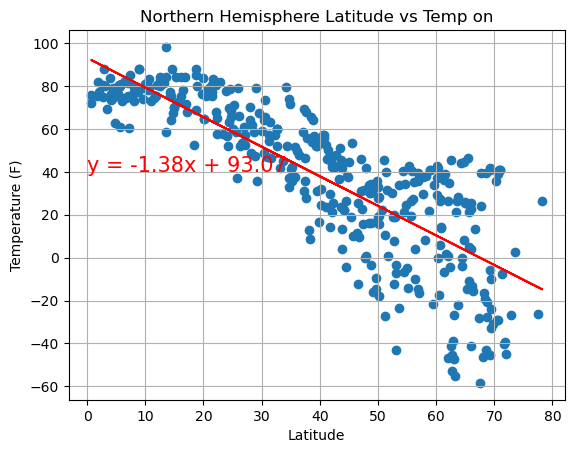

In [28]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Temperature (F)"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Temp on')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.show()

The r-square is 0.3567489216245301
y = 0.22x + 79.13


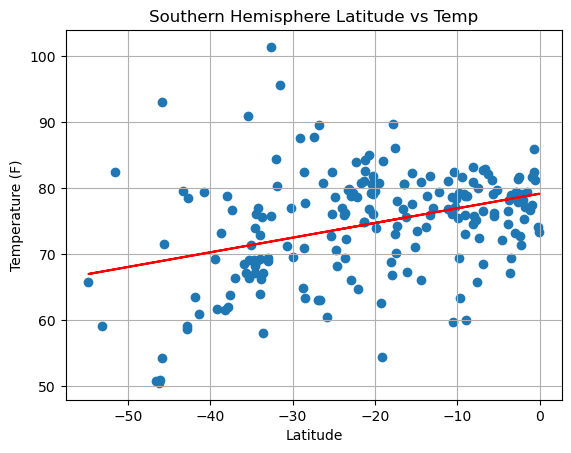

In [31]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
regEQplotX = -25
regEQplotY = 40
y_label = "Temperature (F)"
plt.title(f'Southern Hemisphere Latitude vs Temp')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.show()


**Discussion about the linear relationship:** There is a strong correlation between the distance a city is from the equator and the height of the temperature. The closer to the equator, the higher the temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-square is 0.3941817854931979
y = 0.42x + 55.18


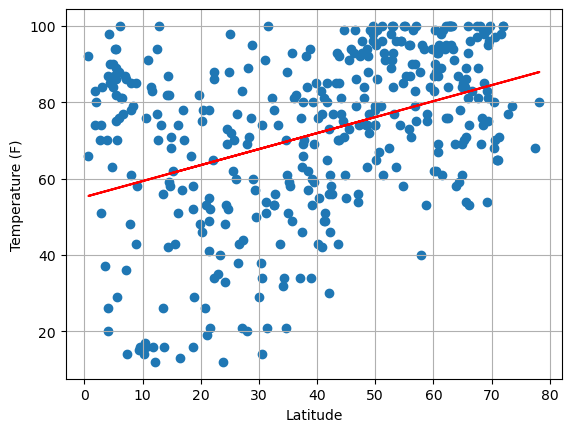

In [33]:
# Northern Hemisphere
# Create a scatter plot for latitude vs humditiy (northern hemisphere)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
regEQplotX = -55
regEQplotY = 35
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig("WeatherPy/northern_hem_linear_lat_vs_humidity.png", bbox_inches="tight")
plt.show()

The r-square is 0.472710516923774
y = 0.67x + 88.32


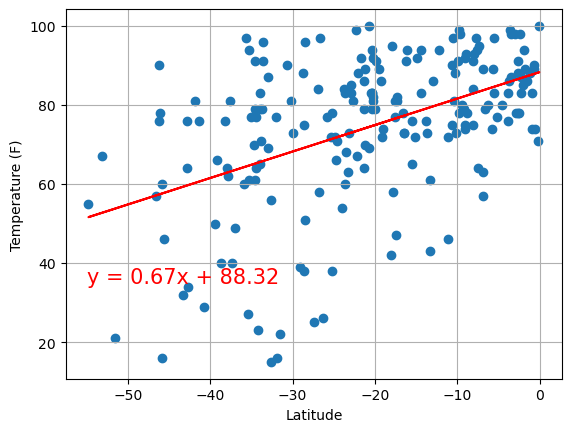

In [34]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
regEQplotX = -55
regEQplotY = 35
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig("WeatherPy/southern_hem_linear_lat_vs_humudity.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** No correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-square is 0.23999568771447233
y = 0.46x + 38.93


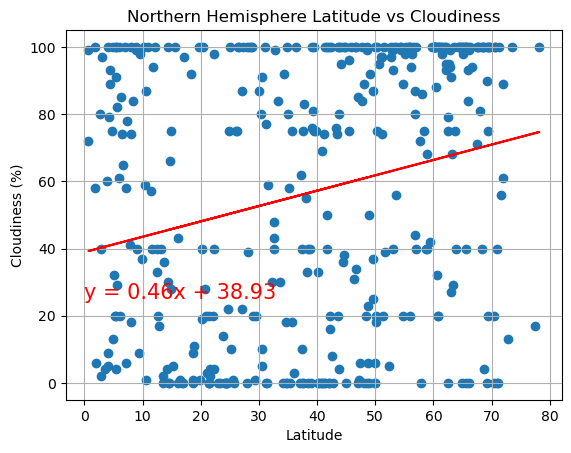

In [35]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
regEQplotX = 0
regEQplotY = 25
y_label = "Cloudiness (%)"
plt.title(f'Northern Hemisphere Latitude vs Cloudiness')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'WeatherPy/Northern Hemisphere Latitude vs Cloudiness.png')
plt.show()

The r-square is 0.30675557553476285
y = 0.87x + 78.23


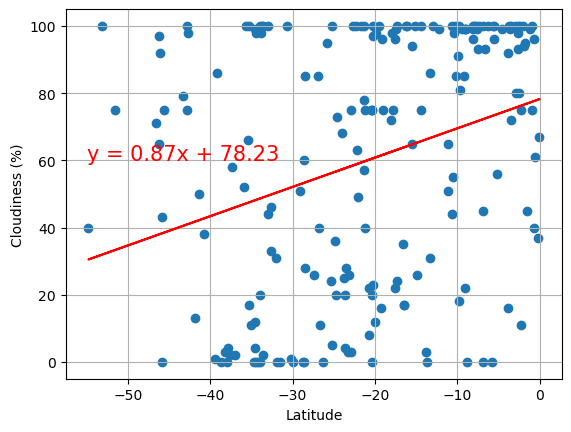

In [36]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
regEQplotX = -55
regEQplotY = 60
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig("WeatherPy/southern_hem_linear_lat_vs_cloudiness.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** No correlation between latitude and cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

The r-square is 0.16965390454102616
y = 0.06x + 6.99


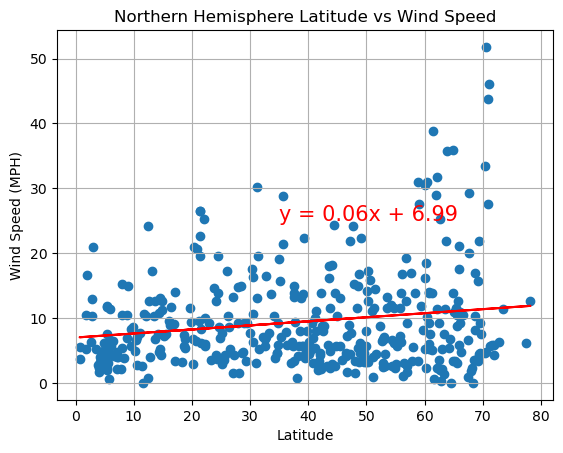

In [38]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
regEQplotX = 35
regEQplotY = 25
y_label = "Wind Speed (MPH)"
plt.title(f'Northern Hemisphere Latitude vs Wind Speed')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'WeatherPy/Northern Hemisphere Latitude vs Wind Speed.png')
plt.show()

The r-square is -0.3642929941488802
y = -0.16x + 5.22


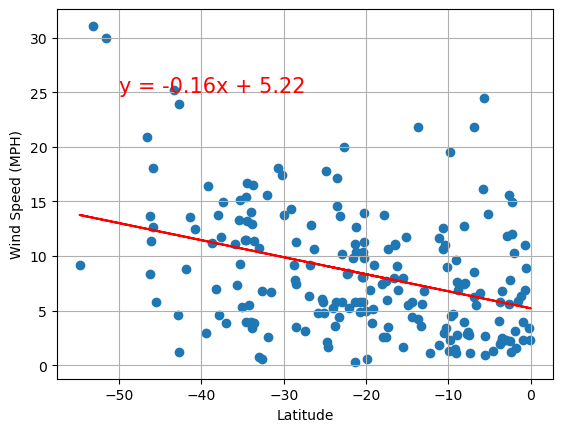

In [40]:
# Create a scatter plot for latitude vs wind speed (southern hemisphere)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
regEQplotX = -50
regEQplotY = 25
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig("WeatherPy/southern_hem_linear_lat_vs_wind_speed.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** No correlation between latitude and wind Speed